# Importing libraries

In [1]:
import numpy as np   # Linear algebra library
import pandas as pd  # data analysis library
import matplotlib.pyplot as plt # visualisation library
import seaborn as sns # visualisation library

# Importing data

In [2]:
df = pd.read_csv('Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# EDA

In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
# Range of the data
df['selling_price'].max() - df['selling_price'].min()

8880000

In [6]:
2.000000e+04

20000.0

# Distributions

Text(0, 0.5, 'Number of occurences')

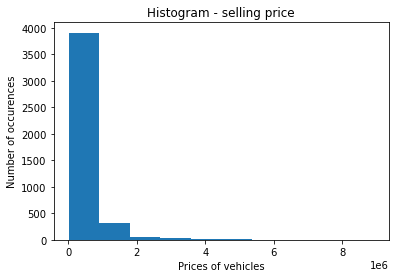

In [7]:
plt.hist(df['selling_price']);
plt.title('Histogram - selling price')
plt.xlabel('Prices of vehicles')
plt.ylabel('Number of occurences')

# Which fuel type of vehicles are costy ?

Text(0.5, 1.0, 'Distribution - fuel type')

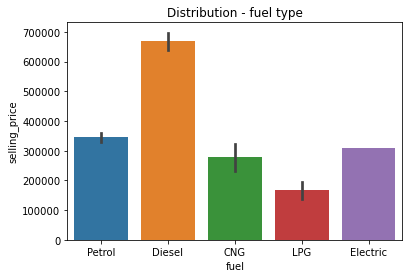

In [8]:
sns.barplot(x = 'fuel' , y = 'selling_price' , data=df);
plt.title('Distribution - fuel type')

# Which mode of transmission - automatic / manaual starting veicles are costly ?

Text(0.5, 1.0, 'Distribution - Transmission')

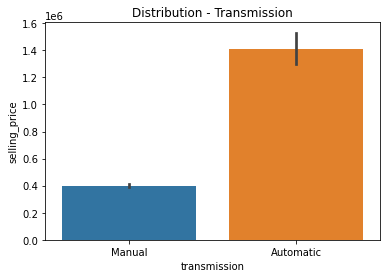

In [9]:
sns.barplot(x = 'transmission' , y = 'selling_price' , data=df);
plt.title('Distribution - Transmission')

# Distribution plots

Text(0.5, 1.0, 'Distribution plot - selling price')

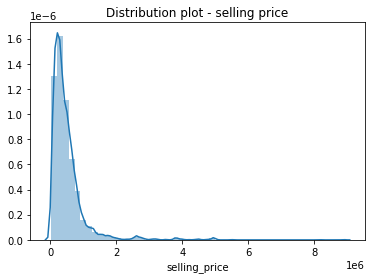

In [10]:
sns.distplot(df['selling_price'])
plt.title('Distribution plot - selling price')

Text(0.5, 1.0, 'Distribution plot - selling price')

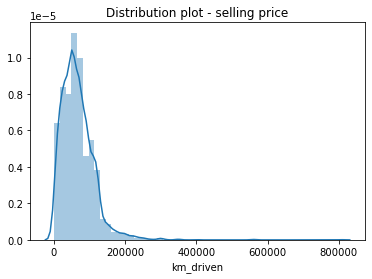

In [11]:
sns.distplot(df['km_driven'])
plt.title('Distribution plot - selling price')

# Outlier analysis

# 1) Check for outliers

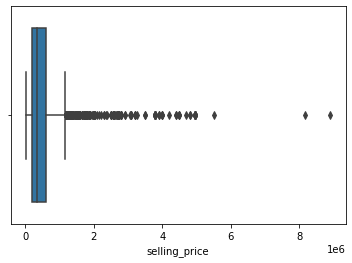

In [12]:
sns.boxplot(df['selling_price'])

# 2) Extracting outliers from the data 

In [15]:
from scipy.stats import zscore

In [16]:
df['zscore_selling price'] = zscore(df['selling_price'])

In [17]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,zscore_selling price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,-0.767746
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,-0.638096
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0.165731


In [18]:
# Observations whose z-score is > 3 and < -3 are considered as outliers
outliers = df[(df['zscore_selling price'] > 3.0) | (df['zscore_selling price'] < -3.0)]

In [19]:
len(outliers)

92

# --> Why these vehicles are costly ?

In [20]:
outliers

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,zscore_selling price
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner,13.217130
96,Audi A8 4.2 TDI,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner,3.968788
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner,6.907513
102,BMW X1 sDrive 20d xLine,2017,2750000,13000,Diesel,Individual,Automatic,First Owner,3.882355
105,BMW 7 Series 730Ld,2012,2500000,48000,Diesel,Dealer,Automatic,First Owner,3.450189
...,...,...,...,...,...,...,...,...,...
4047,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner,6.907513
4186,Toyota Fortuner 2.8 4WD AT BSIV,2017,2750000,41000,Diesel,Individual,Automatic,First Owner,3.882355
4224,Toyota Fortuner 2.7 2WD AT,2016,2500000,70000,Petrol,Individual,Automatic,Second Owner,3.450189
4304,Audi Q5 3.0 TDI Quattro Technology,2018,3899000,22000,Diesel,Dealer,Automatic,First Owner,5.868587


# 3) Removing outliers

In [21]:
def Outliers_remove(df):
    q1 = df['selling_price'].quantile(0.25)
    q3 = df['selling_price'].quantile(0.75)
    IQR = q3-q1
    low = q1 - 1.5*IQR
    high = q3 + 1.5*IQR
    return df.loc[(df['selling_price'] > low) & (df['selling_price'] < high)]

In [22]:
df_1 = Outliers_remove(df)

In [23]:
df_1.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,zscore_selling price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,-0.767746
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,-0.638096
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0.165731


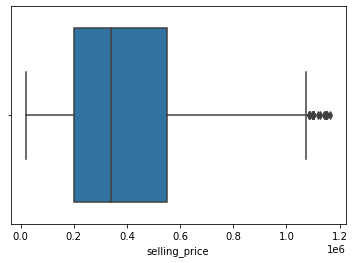

In [24]:
sns.boxplot(df_1['selling_price'])

In [25]:
df_1.describe()

,year,selling_price,km_driven,zscore_selling price
count,4069.000000,4.069000e+03,4069.000000,4069.000000
mean,2012.882035,3.923786e+05,67498.617105,-0.193176
std,4.223110,2.481128e+05,46957.678504,0.428903
min,1992.000000,2.000000e+04,1.000000,-0.836892
25%,2010.000000,2.000000e+05,35000.000000,-0.525733
50%,2013.000000,3.400000e+05,60000.000000,-0.283721
75%,2016.000000,5.500000e+05,90000.000000,0.079298
max,2020.000000,1.165000e+06,806599.000000,1.142426


In [26]:
df_1.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,zscore_selling price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,-0.767746
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,-0.638096
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0.165731


In [27]:
# Removing zscores.

df_1.drop('zscore_selling price',axis=1,inplace=True)

# Adding attributes

In [28]:
# Adding 3 attributes to the data.
df_1['brand'] = df_1['name'].apply(lambda x : x.split()[0]) # barnd of vehicle
df_1['model'] = df_1['name'].apply(lambda x : x.split()[1]) # model of vehicle
df_1['years_used'] = 2020 - df_1['year']  # number of years a vehicle is used.

In [29]:
df_1.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,years_used
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,8


# Which car brand has highest selling price on average ?

In [30]:
df_1.groupby(by='brand').mean()['selling_price'].sort_values(ascending=False)

brand
Audi             1.008333e+06
Mercedes-Benz    8.692000e+05
Mitsubishi       8.400000e+05
BMW              8.200000e+05
Toyota           5.732243e+05
Mahindra         5.164851e+05
Honda            5.074793e+05
Ford             4.746577e+05
Volkswagen       4.627452e+05
Skoda            4.572462e+05
Nissan           4.356507e+05
Renault          4.193767e+05
Hyundai          3.965268e+05
Force            3.460000e+05
Maruti           3.424163e+05
Datsun           2.970269e+05
Fiat             2.834324e+05
Tata             2.526328e+05
Chevrolet        2.367271e+05
Ambassador       1.800000e+05
OpelCorsa        8.850000e+04
Daewoo           6.000000e+04
Name: selling_price, dtype: float64

# Encoding categorical data

In [31]:
df_1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'years_used'],
      dtype='object')

In [32]:
dd = pd.get_dummies(df_1[['fuel','seller_type','transmission','owner']] , drop_first=True)

In [33]:
dd.head(3)

,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,0,0,1,1,0,1,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0


# Peparing final data for training the model

In [34]:
# Removing featrues that are encoded

final_df = df_1.drop(['name','year','fuel','seller_type','transmission','owner','brand','model'] , axis=1)

In [35]:
#concatenating final_df and encoded data

final_df = pd.concat([final_df , dd] , axis=1)

In [36]:
final_df.head()

,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


# Scaling 

In [37]:
# Min Max scaling

from sklearn.preprocessing import MinMaxScaler

In [38]:
scalar = MinMaxScaler()

In [39]:
scaled_data = scalar.fit_transform(final_df)

In [40]:
scaled_data = pd.DataFrame(data=scaled_data , columns=final_df.columns)

# Data split

In [41]:
import statsmodels.api as sm

In [42]:
X = scaled_data.drop('selling_price' , axis=1)
y = scaled_data['selling_price']
X = sm.add_constant(X)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# 25 % of data is for testing and 75% is for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [45]:
len(X_train)

3051

In [46]:
len(X_test)

1018

# Model

In [47]:
X_train.head(2)

,const,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2507,1.0,0.223158,0.285714,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
654,1.0,0.064079,0.321429,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
model = sm.OLS(y_train , X_train).fit()

In [49]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.537     
Dependent Variable:     selling_price       AIC:                   -3018.8366
Date:                   2020-09-05 19:05    BIC:                   -2934.5114
No. Observations:       3051                Log-Likelihood:        1523.4    
Df Model:               13                  F-statistic:           273.3     
Df Residuals:           3037                Prob (F-statistic):    0.00      
R-squared:              0.539               Scale:                 0.021668  
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
const                         0.6085   0.0295  20.6180 0.0000  0.5506  0.6663
km_driven                    -0.3059   0.0577  -5.2999 0.0000 -0.4191 -0.1927
years_used                   -0.7502   0.0217 -34.4932 0.0000 -0.7928 -0.7075
fuel_Diesel                   0.1641   0.0272   6.0322 0.0000  0.1108  0.2175
fuel_Electric                 0.0616   0.1503   0.4099 0.6819 -0.2331  0.3563
fuel_LPG                      0.0057   0.0433   0.1311 0.8957 -0.0792  0.0905
fuel_Petrol                   0.0248   0.0272   0.9108 0.3625 -0.0286  0.0781
seller_type_Individual       -0.0325   0.0069  -4.7134 0.0000 -0.0460 -0.0190
seller_type_Trustmark Dealer  0.1372   0.0195   7.0211 0.0000  0.0989  0.1755
transmission_Manual          -0.1366   0.0114 -11.9322 0.0000 -0.1591 -0.1142
owner_Fourth & Above Owner   -0.0090   0.0197  -0.4575 0.6474 -0.0476  0.0296
owner_Second Owner           -0.0182   0.0068  -2.6863 0.0073 -0.0314 -0.0049
owner_Test Drive Car          0.2047   0.0471   4.3452 0.0000  0.1123  0.2970
owner_Third Owner            -0.0273   0.0112  -2.4312 0.0151 -0.0493 -0.0053
-----------------------------------------------------------------------------
Omnibus:                  404.260          Durbin-Watson:             1.979  
Prob(Omnibus):            0.000            Jarque-Bera (JB):          679.177
Skew:                     0.889            Prob(JB):                  0.000  
Kurtosis:                 4.478            Condition No.:             101    
=============================================================================

"""

# Check for multi-collinearity

# Step 1 : Calculating VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()  # Creating empty data frame
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # calculating vif's
vif["features"] = X.columns # retrieving columns

In [52]:
vif

,VIF Factor,features
0,122.184147,const
1,1.465183,km_driven
2,1.510684,years_used
3,25.992065,fuel_Diesel
4,1.031383,fuel_Electric
5,1.571815,fuel_LPG
6,26.088570,fuel_Petrol
7,1.199214,seller_type_Individual
8,1.088373,seller_type_Trustmark Dealer
9,1.039333,transmission_Manual


# Step 2 : Extract the features for which VIF > 4

In [53]:
features_with_large_vif = vif[vif['VIF Factor']> 4]['features']
features_with_large_vif = features_with_large_vif.loc[1:]

In [54]:
features_with_large_vif

3    fuel_Diesel
6    fuel_Petrol
Name: features, dtype: object

# step 3 : Check correlation of features with large VIF's

Text(0.5, 1.0, 'Check for multi-collinearity')

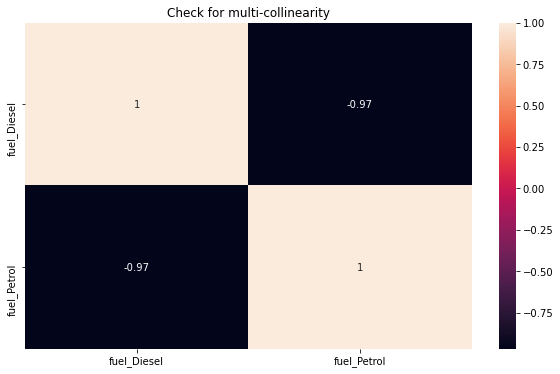

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(scaled_data[features_with_large_vif].corr(), annot=True)
plt.title('Check for multi-collinearity')

# RFE

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()

In [58]:
from sklearn.feature_selection import RFE

In [59]:
# RFE selects top 10 best features

rfe = RFE(estimator=lm , n_features_to_select=10)

In [60]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [61]:
# Best features obtained are :

col = X_train.columns[rfe.support_]
col

Index(['km_driven', 'years_used', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

# Attempt - 2

In [62]:
X1 = scaled_data[col]
y1 = scaled_data['selling_price']

In [63]:
# 75 % for traing data andd 25 % for testing data.
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

In [64]:
model_2 = sm.OLS(y_train,X_train).fit()

In [65]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.826     
Dependent Variable:     selling_price    AIC:                         -2411.0300
Date:                   2020-09-05 19:05 BIC:                         -2350.7978
No. Observations:       3051             Log-Likelihood:              1215.5    
Df Model:               10               F-statistic:                 1452.     
Df Residuals:           3041             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.827            Scale:                       0.026479  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
km_driven                       -0.1666   0.0630  -2.6443 0.0082 -0.2902 -0.0431
years_used                      -0.6934   0.0225 -30.8708 0.0000 -0.7375 -0.6494
fuel_Diesel                      0.6300   0.0118  53.2184 0.0000  0.6068  0.6532
fuel_Electric                    0.6128   0.1630   3.7586 0.0002  0.2931  0.9325
fuel_Petrol                      0.4961   0.0113  43.8028 0.0000  0.4739  0.5183
seller_type_Individual          -0.0081   0.0075  -1.0921 0.2749 -0.0228  0.0065
seller_type_Trustmark Dealer     0.1842   0.0212   8.6783 0.0000  0.1426  0.2259
transmission_Manual             -0.0423   0.0109  -3.8973 0.0001 -0.0636 -0.0210
owner_Test Drive Car             0.2615   0.0458   5.7100 0.0000  0.1717  0.3513
owner_Third Owner               -0.0361   0.0117  -3.0943 0.0020 -0.0590 -0.0132
--------------------------------------------------------------------------------
Omnibus:                   489.984           Durbin-Watson:              2.046  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           835.538
Skew:                      1.046             Prob(JB):                   0.000  
Kurtosis:                  4.482             Condition No.:              81     
================================================================================

"""

# Check for Overfit / Underfit

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm = LinearRegression()

In [68]:
lm = lm.fit(X_train,y_train)

In [69]:
# Predictions
predictions = lm.predict(X_test)

In [70]:
# RMSE
from sklearn import metrics

print('RMSE for training data : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

RMSE for training data : 0.1504722302000517


# Evaluating linear model

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
lm2 = LinearRegression()

In [73]:
score = cross_val_score(estimator=lm2 , X = X_train , y=y_train , cv=10 , scoring='neg_mean_squared_error')

In [74]:
lm_rmse_scores = np.sqrt(-score)

In [75]:
def display_scores(scores):
    print('Scores :' , score)
    print('Mean :' , score.mean())
    print('std dev :' , score.std())

In [76]:
display_scores(lm_rmse_scores)

Scores : [-0.02068567 -0.02069693 -0.02139066 -0.02416218 -0.02400087 -0.02198636
 -0.02222805 -0.02276028 -0.02257422 -0.02033249]
Mean : -0.022081771588636508
std dev : 0.001270784146569587


# Model Diagnosis

# 1) Residual Analysis

Text(0.5, 1.0, 'Check for normal distribution of Residuals')

<Figure size 864x576 with 0 Axes>

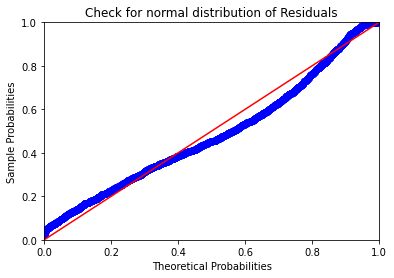

In [82]:
residuals = model_2.resid_pearson
probplot = sm.ProbPlot(residuals)
plt.figure(figsize=(12,8))
probplot.ppplot(line='45')
plt.title('Check for normal distribution of Residuals')

# 2) Test for homoscedasticity

In [83]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

Text(0, 0.5, 'Standardized Residuals')

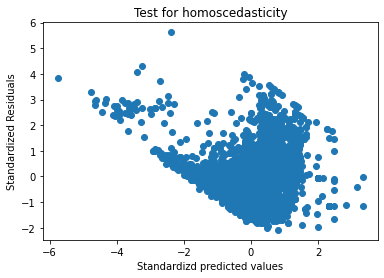

In [85]:
plt.scatter(get_standardized_values(model_2.fittedvalues) , get_standardized_values(model_2.resid))
plt.title('Test for homoscedasticity')
plt.xlabel('Standardizd predicted values')
plt.ylabel('Standardized Residuals')

# Attempt 3 - Applying transformation techniques and building model

In [86]:
# Deriving new label by taking square root of existing values.
y_train = np.sqrt(y_train)

In [87]:
model_55 = sm.OLS(y_train , X_train).fit()

In [88]:
model_55.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.930     
Dependent Variable:     selling_price    AIC:                         -2899.5677
Date:                   2020-09-05 19:32 BIC:                         -2839.3355
No. Observations:       3051             Log-Likelihood:              1459.8    
Df Model:               10               F-statistic:                 4081.     
Df Residuals:           3041             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.931            Scale:                       0.022561  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
km_driven                       -0.0002   0.0582  -0.0041 0.9967 -0.1143  0.1138
years_used                      -0.6993   0.0207 -33.7257 0.0000 -0.7399 -0.6586
fuel_Diesel                      0.7598   0.0109  69.5330 0.0000  0.7384  0.7812
fuel_Electric                    0.8529   0.1505   5.6674 0.0000  0.5578  1.1480
fuel_Petrol                      0.6460   0.0105  61.7976 0.0000  0.6255  0.6665
seller_type_Individual          -0.0063   0.0069  -0.9122 0.3617 -0.0198  0.0072
seller_type_Trustmark Dealer     0.1553   0.0196   7.9244 0.0000  0.1169  0.1937
transmission_Manual              0.0198   0.0100   1.9789 0.0479  0.0002  0.0395
owner_Test Drive Car             0.1720   0.0423   4.0693 0.0000  0.0891  0.2549
owner_Third Owner               -0.0367   0.0108  -3.4035 0.0007 -0.0578 -0.0155
--------------------------------------------------------------------------------
Omnibus:                  717.699           Durbin-Watson:              2.051   
Prob(Omnibus):            0.000             Jarque-Bera (JB):           2214.666
Skew:                     1.191             Prob(JB):                   0.000   
Kurtosis:                 6.427             Condition No.:              81      
================================================================================

"""

# Test for homoscedasticity - 2

Text(0, 0.5, 'Standardized Residuals')

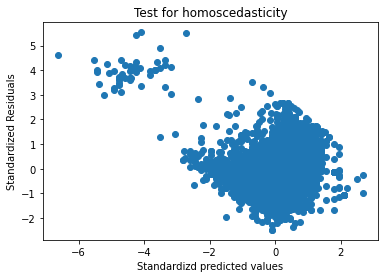

In [90]:
plt.scatter(get_standardized_values(model_55.fittedvalues) , get_standardized_values(model_55.resid_pearson))
plt.title('Test for homoscedasticity')
plt.xlabel('Standardizd predicted values')
plt.ylabel('Standardized Residuals')

# Prediction intervals

In [91]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [92]:
pred_y = model_55.predict(X_test)

In [93]:
_ , pred_low , pred_high = wls_prediction_std(model_55 , X_test , alpha=0.1)

In [94]:
intervals = pd.DataFrame({'Actual selling price': y_test , 'pred_y':pred_y , 'pred_y_left' : pred_low , 'pred_y_right': pred_high})

In [95]:
intervals.head()

,Actual selling price,pred_y,pred_y_left,pred_y_right
3732,0.397380,0.484725,0.237486,0.731965
3465,0.350218,0.598520,0.351226,0.845814
573,0.158078,0.459743,0.212475,0.707010
760,0.331878,0.584633,0.337329,0.831937
420,0.253275,0.609609,0.362273,0.856946
